In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data file.csv')

In [3]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
data['pdate'] = pd.to_datetime(data['pdate'])

In [5]:
data['pdate_ordinal']= data['pdate'].apply(lambda date: date.toordinal())

In [6]:
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data.drop(columns='msisdn',inplace=True)

In [8]:
data.drop(columns='pcircle',inplace=True)

In [9]:
data.drop('pdate',axis=1,inplace=True)

In [10]:
data.shape

(209593, 34)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [12]:
data.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [13]:
data.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate_ordinal           0
dtype: int64

In [14]:
data.duplicated().sum()

31

In [15]:
data[data.duplicated()]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_ordinal
35769,0,118.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736127
49751,0,347.0,-2.666667,-2.666667,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736135
51852,0,671.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736125
57581,0,152.0,500.000000,500.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736154
68296,0,51.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736117
90887,0,81.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736124
94430,0,127.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736118
98092,0,62.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736127
111140,0,150.0,500.000000,500.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736151
124619,0,542.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0,0,...,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00,736125


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(209562, 34)

In [19]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_ordinal
count,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,...,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000,209562.000000
mean,0.875297,8113.512796,5382.170031,6083.386523,2692.964058,3483.905668,3756.403389,3712.752058,2064.754512,3.978622,...,17.953703,274.698489,0.054037,18.523497,23.647923,6.703238,0.046084,3.399125,4.321920,736153.515781
std,0.330383,75701.620014,9221.086606,10919.382966,4308.784971,5770.737718,53909.859829,53378.762010,2370.831005,4.256138,...,17.380433,4245.577376,0.218054,224.813949,26.470977,2.104003,0.200706,8.813867,10.308399,21.988794
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736116.000000
25%,1.000000,246.000000,42.480000,42.713250,280.800000,300.370000,1.000000,0.000000,770.000000,1.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,736135.000000
50%,1.000000,527.000000,1470.465667,1500.000000,1083.940000,1334.400000,3.000000,0.000000,1539.000000,3.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,736153.000000
75%,1.000000,982.000000,7246.000000,7804.000000,3357.452500,4202.537500,7.000000,0.000000,2309.000000,5.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,736171.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,736197.000000


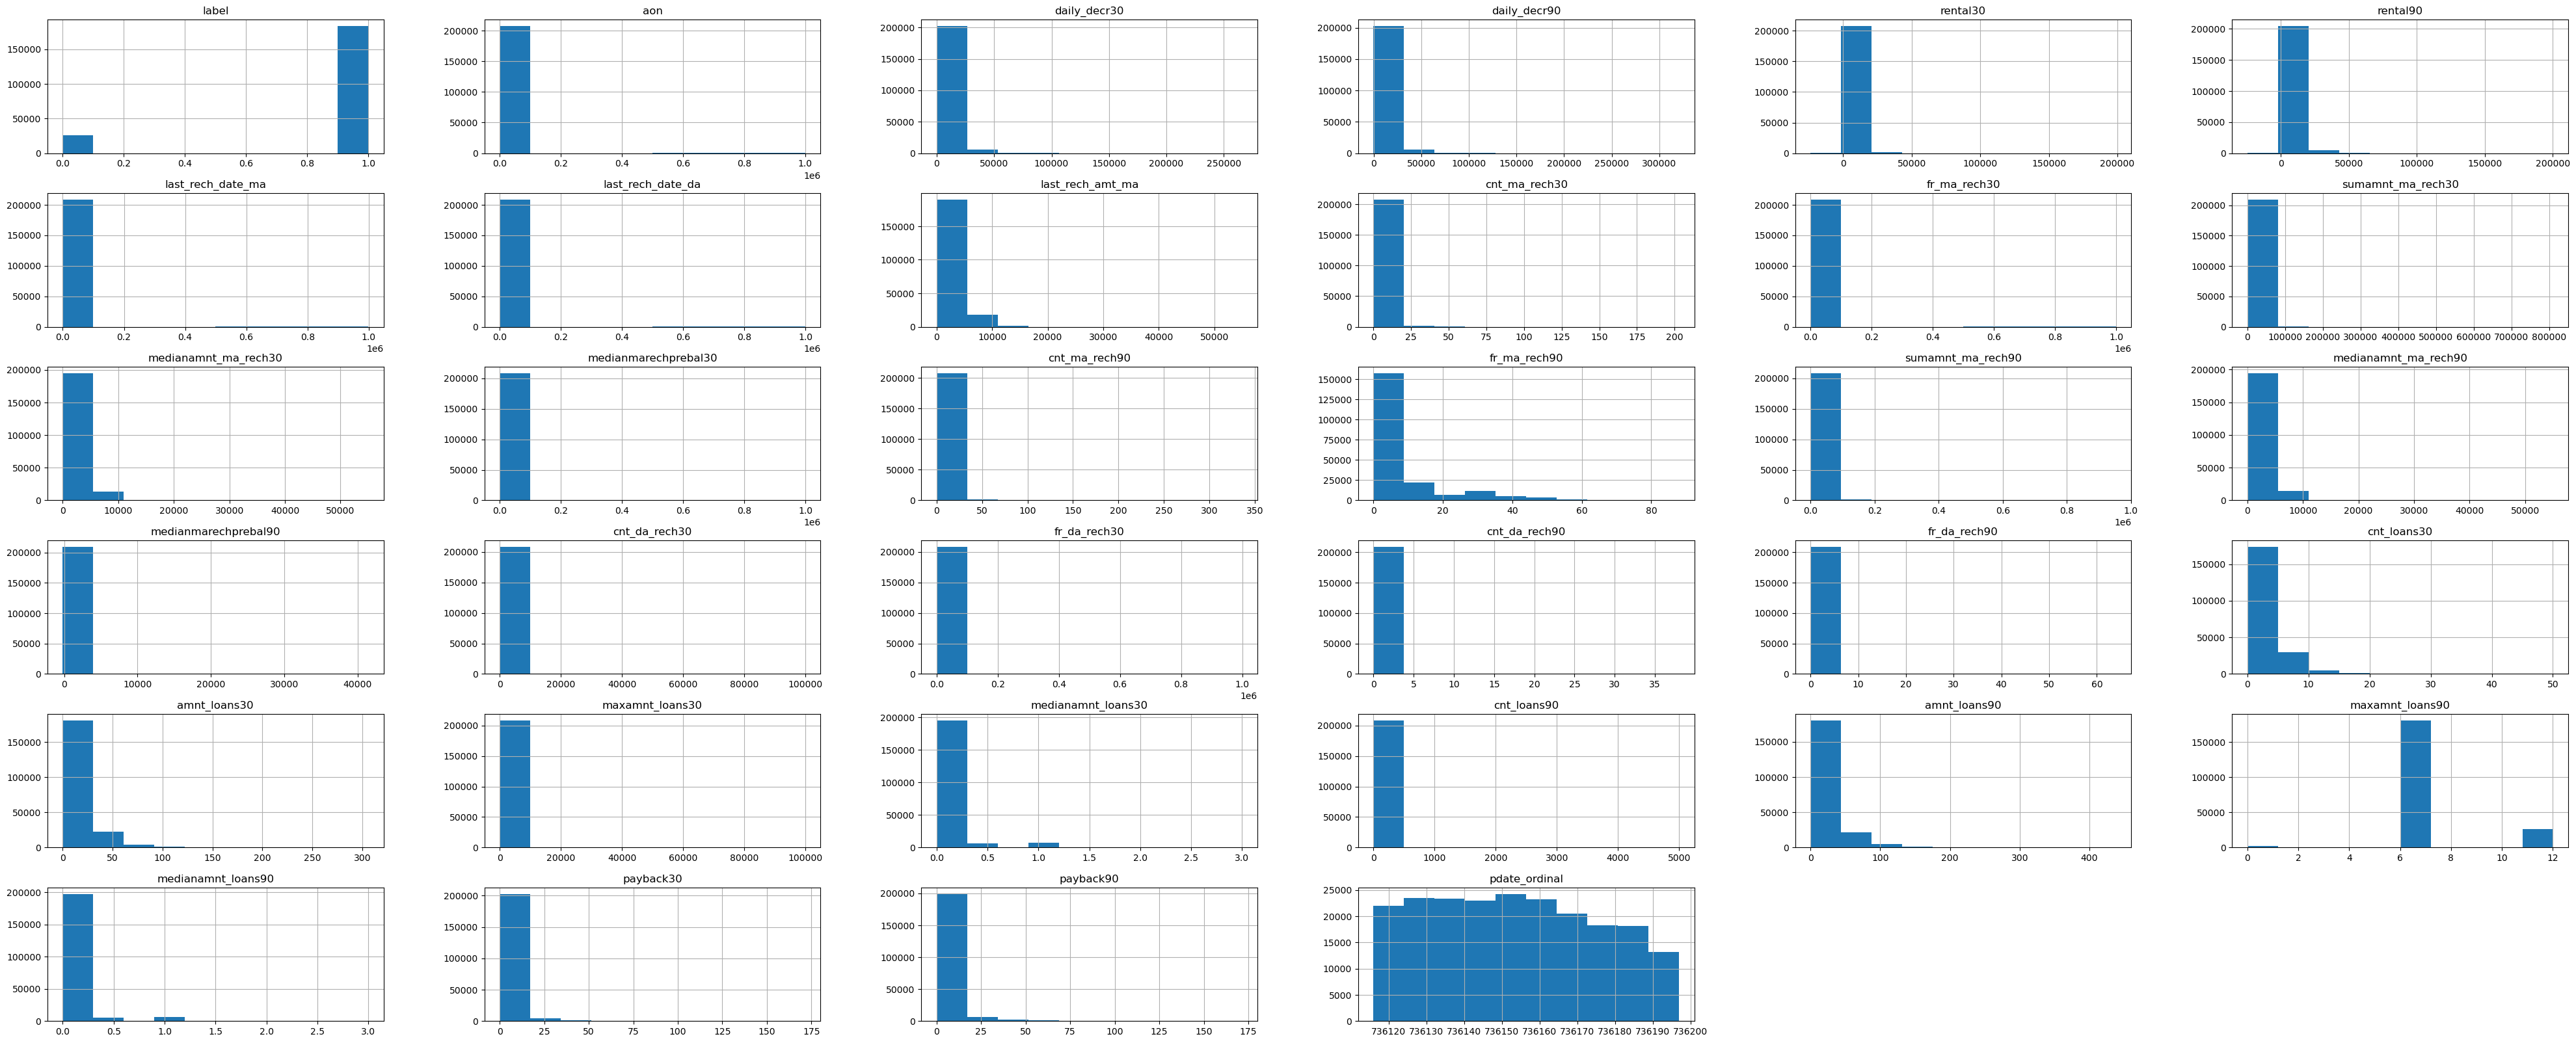

In [20]:
data.hist(figsize=(50,20))
plt.show()

In [21]:
datacorr=data.corr()

In [22]:
datacorr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_ordinal
label,1.000000,-0.003825,0.168174,0.166034,0.057886,0.075339,0.003705,0.001687,0.131558,0.237120,...,0.197123,0.000225,0.044521,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050,0.162371
aon,-0.003825,1.000000,0.001096,0.000366,-0.000969,-0.000799,0.001691,-0.001694,0.004243,-0.003162,...,-0.001736,-0.002765,0.004660,-0.000612,-0.002329,-0.001196,0.002767,0.001936,0.002199,-0.001665
daily_decr30,0.168174,0.001096,1.000000,0.977703,0.442038,0.458950,0.000481,-0.001641,0.275787,0.451347,...,0.471463,-0.000033,-0.011631,0.008956,0.563473,0.400184,-0.037325,0.026891,0.047148,0.534178
daily_decr90,0.166034,0.000366,0.977703,1.000000,0.434658,0.471705,0.000903,-0.001892,0.264082,0.426670,...,0.447840,0.000020,-0.005611,0.009440,0.567182,0.397237,-0.034705,0.019377,0.040775,0.545591
rental30,0.057886,-0.000969,0.442038,0.434658,1.000000,0.955235,-0.001101,0.003255,0.127204,0.233281,...,0.233406,-0.000870,-0.016505,0.004005,0.298902,0.234190,-0.035510,0.072942,0.095114,0.388315
rental90,0.075339,-0.000799,0.458950,0.471705,0.955235,1.000000,-0.001694,0.002788,0.121351,0.230199,...,0.231861,-0.001417,-0.009488,0.005134,0.327397,0.251008,-0.034143,0.067083,0.099473,0.443858
last_rech_date_ma,0.003705,0.001691,0.000481,0.000903,-0.001101,-0.001694,1.000000,0.001790,-0.000156,0.004302,...,0.000896,0.000928,0.001833,-0.000226,0.000863,-0.001126,0.002768,-0.002235,-0.001586,-0.000986
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003255,0.002788,0.001790,1.000000,-0.000158,0.001540,...,0.000529,0.000502,0.000059,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414,-0.001617
last_rech_amt_ma,0.131558,0.004243,0.275787,0.264082,0.127204,0.121351,-0.000156,-0.000158,1.000000,-0.002778,...,0.008418,0.000992,0.028341,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304,0.109971
cnt_ma_rech30,0.237120,-0.003162,0.451347,0.426670,0.233281,0.230199,0.004302,0.001540,-0.002778,1.000000,...,0.752277,0.000101,-0.067048,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304,0.185364


<Axes: >

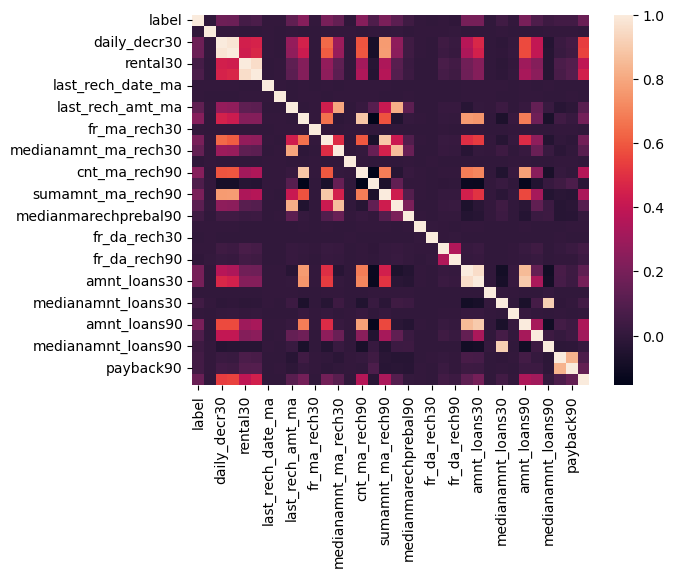

In [23]:
sns.heatmap(datacorr)

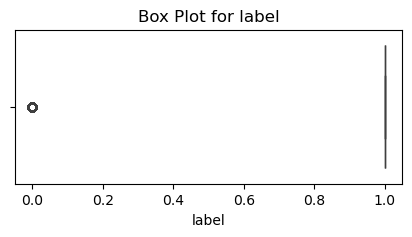

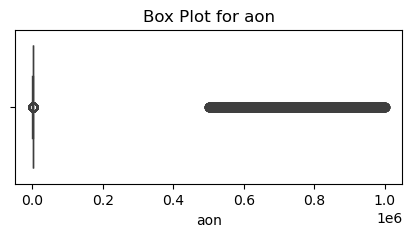

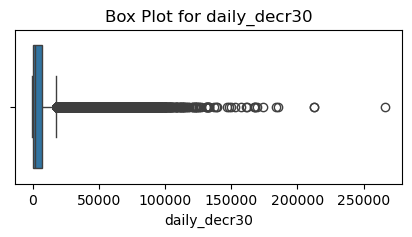

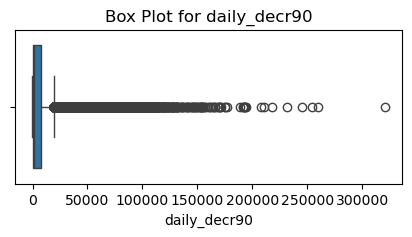

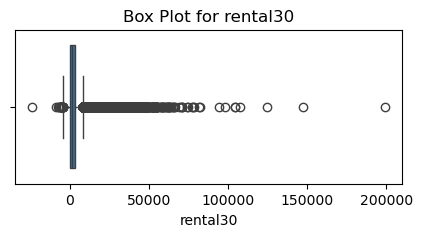

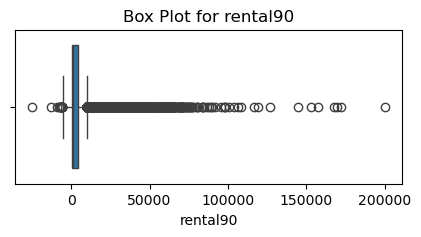

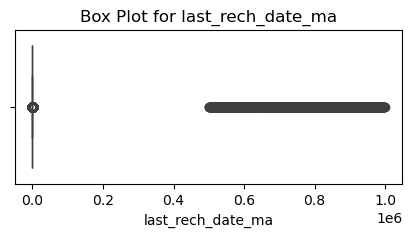

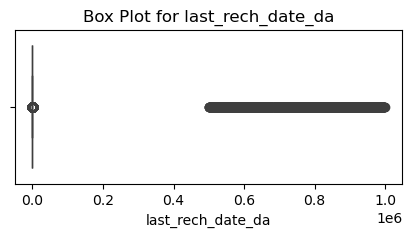

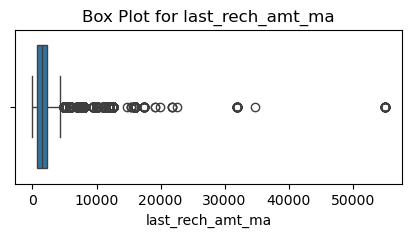

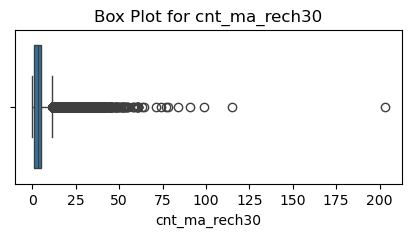

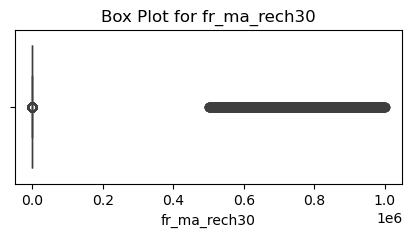

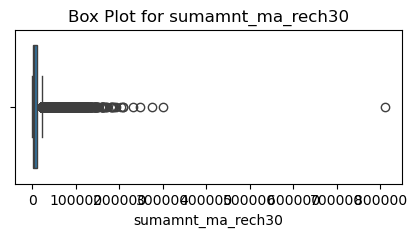

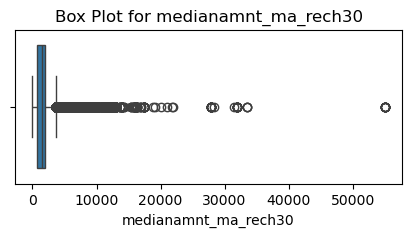

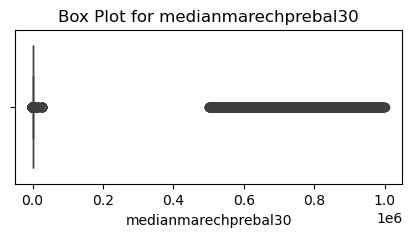

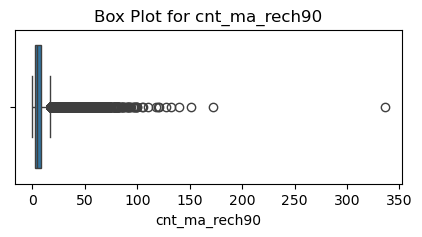

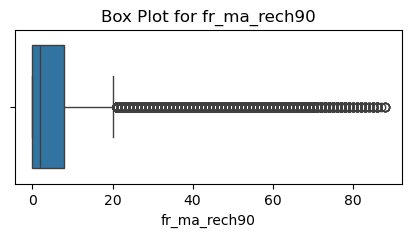

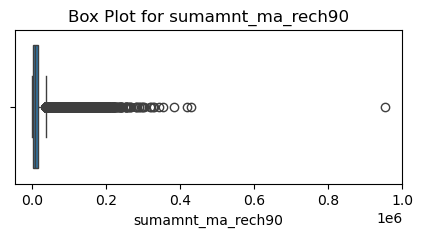

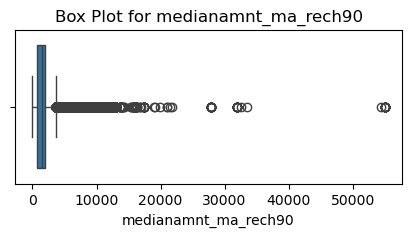

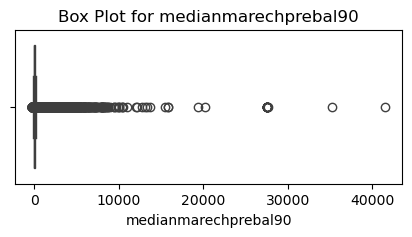

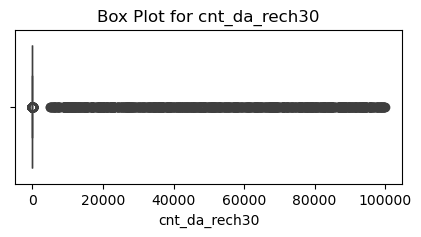

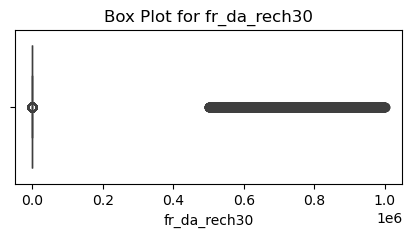

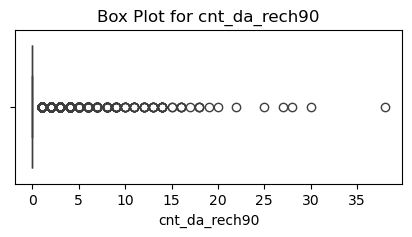

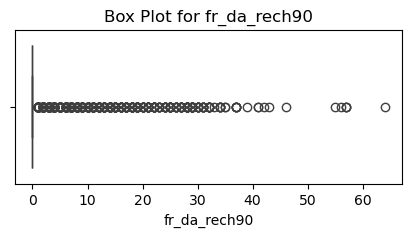

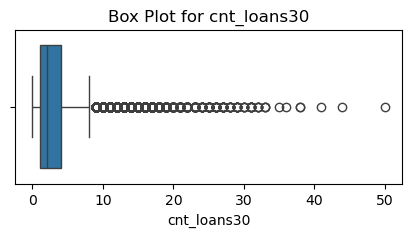

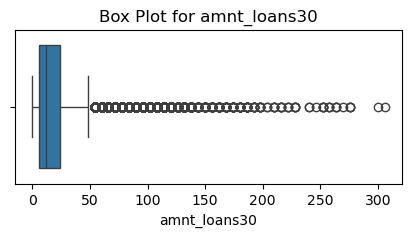

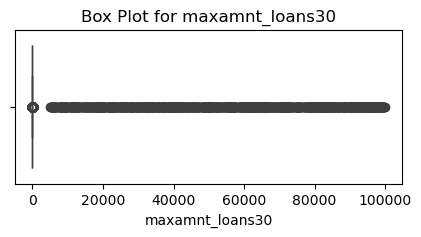

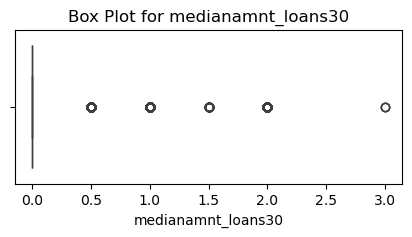

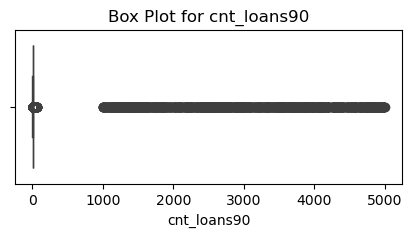

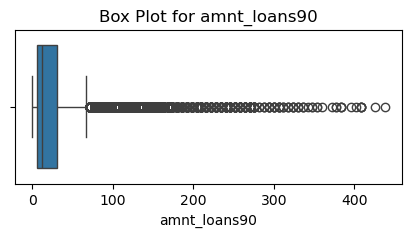

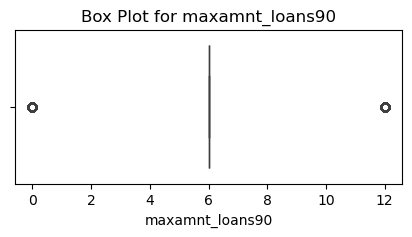

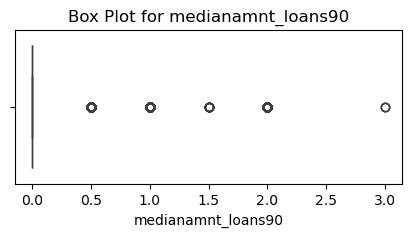

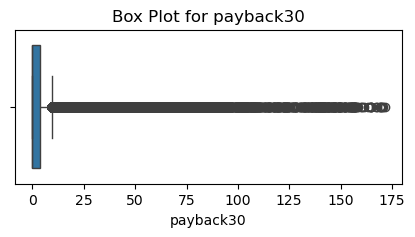

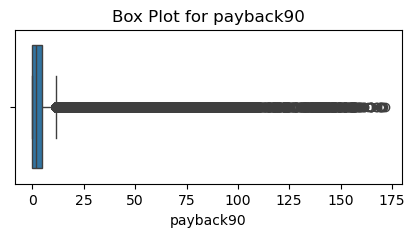

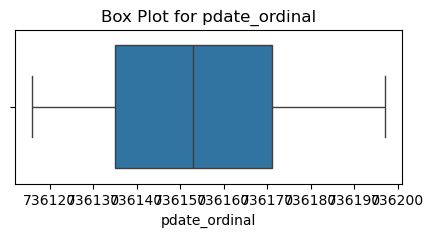

In [24]:
for column in data.columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [25]:
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)

    outliers= []

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers
    
# Loop over all numeric columns and apply the Z-score method
outliers_info = {}

for col in data.columns:
    if col != 'label':  # Assuming 'label' is not used for outlier detection
        outliers = find_outliers(data[col])
        
        # Store the number of outliers and the percentage of data they represent
        outlier_count = len(outliers)
        total_data_points = len(data[col])
        outlier_percentage = (outlier_count / total_data_points) * 100
        
        outliers_info[col] = {
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'outliers': outliers
        }

# Display the outliers and their percentages
for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f"Outlier Count: {info['outlier_count']}")
    print(f"Outlier Percentage: {info['outlier_percentage']:.2f}%")

Column: aon
Outlier Count: 2089
Outlier Percentage: 1.00%
Column: daily_decr30
Outlier Count: 4168
Outlier Percentage: 1.99%
Column: daily_decr90
Outlier Count: 4263
Outlier Percentage: 2.03%
Column: rental30
Outlier Count: 4470
Outlier Percentage: 2.13%
Column: rental90
Outlier Count: 4604
Outlier Percentage: 2.20%
Column: last_rech_date_ma
Outlier Count: 1047
Outlier Percentage: 0.50%
Column: last_rech_date_da
Outlier Count: 1047
Outlier Percentage: 0.50%
Column: last_rech_amt_ma
Outlier Count: 4257
Outlier Percentage: 2.03%
Column: cnt_ma_rech30
Outlier Count: 3766
Outlier Percentage: 1.80%
Column: fr_ma_rech30
Outlier Count: 1047
Outlier Percentage: 0.50%
Column: sumamnt_ma_rech30
Outlier Count: 3616
Outlier Percentage: 1.73%
Column: medianamnt_ma_rech30
Outlier Count: 2973
Outlier Percentage: 1.42%
Column: medianmarechprebal30
Outlier Count: 1047
Outlier Percentage: 0.50%
Column: cnt_ma_rech90
Outlier Count: 4047
Outlier Percentage: 1.93%
Column: fr_ma_rech90
Outlier Count: 4707
O

In [26]:
data['label'].value_counts()

label
1    183429
0     26133
Name: count, dtype: int64

In [27]:
X=data.drop(columns='label')
y=data['label']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.22,stratify=y,random_state=43)

#### Standardization 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler= StandardScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [34]:
X_train

array([[-0.09085104,  0.57454044,  0.42862723, ...,  0.1824517 ,
         0.31476149,  1.06918778],
       [-0.10224391,  0.32709999,  0.54337873, ...,  0.55167603,
         0.62287674,  1.47869263],
       [-0.10101296,  0.82394296,  0.78280678, ...,  0.01204047,
        -0.12837055,  1.11468832],
       ...,
       [-0.10555701,  0.38465442,  0.34258064, ...,  0.35286293,
         0.01703216,  1.02368724],
       [-0.09386295,  0.27695788,  0.32896225, ..., -0.1205016 ,
        -0.11625365,  1.06918778],
       [-0.10346177, -0.58155757, -0.55536353, ..., -0.38558573,
        -0.41917595, -0.93283592]])

#### Logistic Regression

In [36]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_predq = log_reg.predict(X_test)
y_predq

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
accuracy_score(y_test,y_predq)

0.8764966163456533

In [39]:
from sklearn.metrics import *
print(classification_report(y_test,y_predq))

              precision    recall  f1-score   support

           0       0.62      0.02      0.05      5749
           1       0.88      1.00      0.93     40355

    accuracy                           0.88     46104
   macro avg       0.75      0.51      0.49     46104
weighted avg       0.85      0.88      0.82     46104



In [40]:
param_log={
    "penalty":['l1','l2','elasticnet','none'],
    "C":np.logspace(-4,4,20),
    "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "max_iter":[100,1000,2500,5000]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [197]:
y_probq= log_reg.predict_proba(X_test)[:,1]
roc_auc= roc_auc_score(y_test, y_probq)

print(roc_auc)

0.8316592485559162


In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_probq)

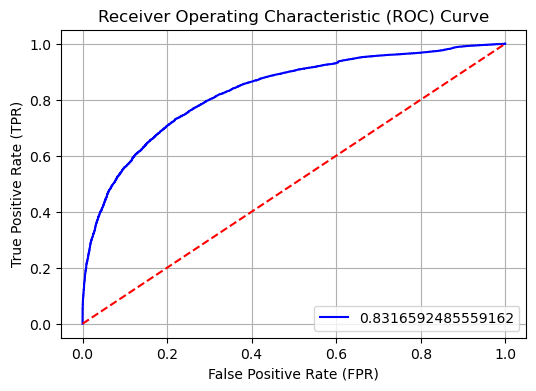

In [202]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [45]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_predd = dec_tree.predict(X_test)

In [47]:
y_predd

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
accuracy_score(y_test,y_predd) # for accuracy_score

0.8845219503730696

In [50]:
print(classification_report(y_test,y_predd)) # for recall,precision & f1-score 

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      5749
           1       0.94      0.93      0.93     40355

    accuracy                           0.88     46104
   macro avg       0.74      0.74      0.74     46104
weighted avg       0.89      0.88      0.89     46104



In [51]:
param_dist={
    "criterion":["gini","Entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,20]
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid=GridSearchCV(dec_tree,param_grid=param_dist,cv=10,n_jobs=-1)

In [54]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]})

In [55]:
grid.best_score_

0.9176852724111507

In [56]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [187]:
y_probd= dec_tree.predict_proba(X_test)[:,1]
roc_auc= roc_auc_score(y_test, y_probd)

print(roc_auc)

0.7446059809381338


In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_probd)

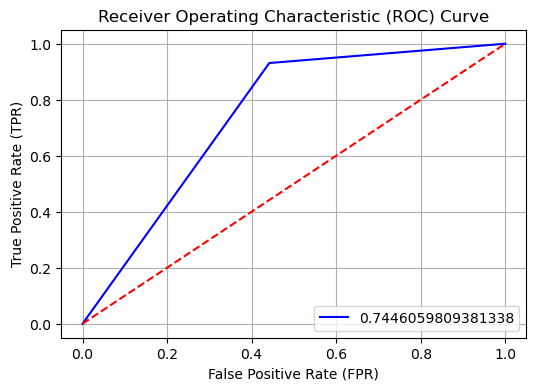

In [195]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_data=RandomForestClassifier(n_estimators=50,random_state=42)

In [60]:
rf_data

RandomForestClassifier(n_estimators=50, random_state=42)

In [61]:
rf_data.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [62]:
y_preda=rf_data.predict(X_test)

In [63]:
y_preda

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [64]:
from sklearn.metrics import *

In [65]:
accuracy_score(y_test,y_preda)

0.920158771473191

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.77      0.52      0.62      5749
           1       0.93      0.98      0.96     40355

    accuracy                           0.92     46104
   macro avg       0.85      0.75      0.79     46104
weighted avg       0.91      0.92      0.91     46104



In [179]:
y_probr= rf_data.predict_proba(X_test)[:,1]
roc_aucc= roc_auc_score(y_test, y_probr)

print(roc_aucc)

0.9238550394385332


In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_probr)

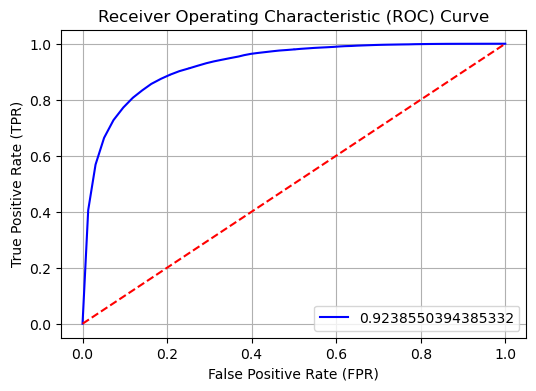

In [183]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=roc_aucc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn_C=KNeighborsClassifier(n_neighbors= 5)

In [70]:
knn_C.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_predo=knn_C.predict(X_test)

In [72]:
y_predo

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
from sklearn.metrics import *

In [74]:
accuracy_score(y_test,y_predo)

0.8889250390421656

In [75]:
print(classification_report(y_test,y_predo))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48      5749
           1       0.92      0.96      0.94     40355

    accuracy                           0.89     46104
   macro avg       0.75      0.68      0.71     46104
weighted avg       0.88      0.89      0.88     46104



In [78]:
gridknn=GridSearchCV(knn_C, param_grid=param_distt,cv=5, n_jobs=-1)

In [161]:
y_probs= knn_C.predict_proba(X_test)[:,1]
roc_auc= roc_auc_score(y_test, y_probs)

print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.8103


In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

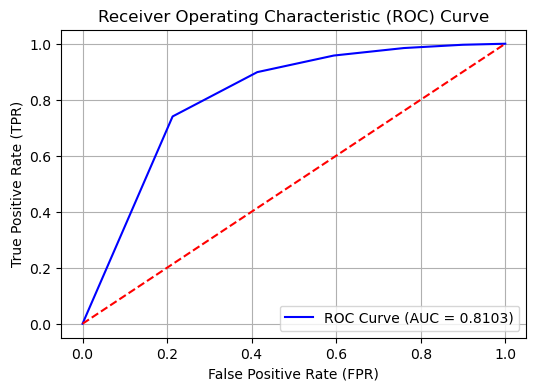

In [167]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()